In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [111]:
df = pd.read_csv('wiki-RfA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


# Time series visualisation

### Handle missing data

In [112]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,0.000000
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,NaN
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,197.883333


The voting_time series gives the time in minute at which each vote was cast compared to the first vote recorded for the same target (we consider this as the opening of the polls). Thus, for each target we should have a voting_time of 0.

In [113]:
# Convert Vote, Results and Year to int
df_timeserie['Vote'] = df_timeserie['Vote'].astype(int)
df_timeserie['Results'] = df_timeserie['Results'].astype(int)
df_timeserie['Year'] = df_timeserie['Year'].astype(int)

In [114]:
# Plot basic statistics
df_timeserie['Voting_time'].describe().round(2)

count    188907.00
mean       1915.66
std        5930.65
min           0.00
25%          10.43
50%          46.52
75%         157.34
max       72598.02
Name: Voting_time, dtype: float64

In [115]:
# Targets where all voting times are NaN
nan_target = set(df_timeserie.Target.unique()) - set(df_timeserie[~df_timeserie['Voting_time'].isna()].Target.unique())
print('Number of target without time data:', len(nan_target), ', corresponding to', round(len(nan_target)/len(df_timeserie.Target.unique())*100, 2), '% of all targets')
print('Target without time data:', nan_target)

# Amount of NaN values in the voting time column
print('Number of NaN values in the voting time column:', df_timeserie['Voting_time'].isna().sum(), ', corresponding to', round(df_timeserie['Voting_time'].isna().sum()/len(df_timeserie)*100, 2), '% of all values')

Number of target without time data: 29 , corresponding to 0.83 % of all targets
Target without time data: {'Patrick', 'Cyan', 'Schneelocke', 'Meelar', 'Dori', 'Noel', 'CYD', 'J.J.', 'Vsmith', 'Tompagenet', 'wavelab1', 'Bishonen', 'Stevertigo', 'Jdforrester', 'Mrmewe', 'Starblind', 'Woohookitty', 'Zanimum', 'RickK', 'Feco', 'Mintguy', 'Olivier', 'Fantasy', 'Lionelisbest', 'Chadloder', 'Sarge Baldy', 'Talrias', 'Craigy144', 'Delirium'}
Number of NaN values in the voting time column: 9368 , corresponding to 4.72 % of all values


In [116]:
# Remove NaN values in the voting time column
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]

## Distribution of the voting time

In [117]:
warnings.filterwarnings('ignore')

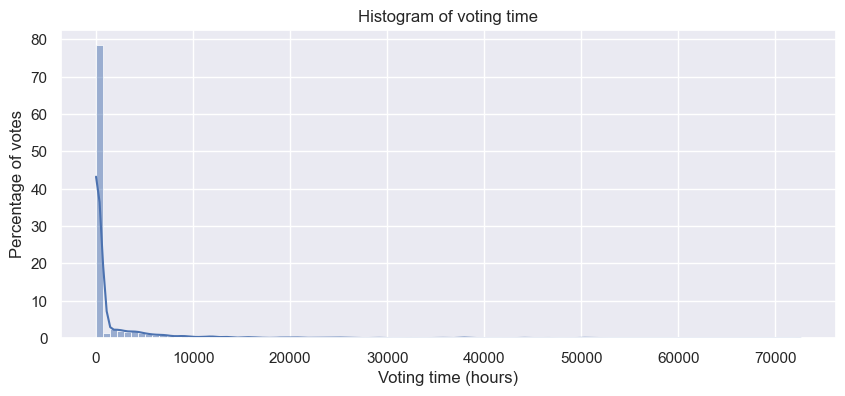

In [118]:
# Plot histogram of voting time
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

In [119]:
# Remove the vote at time 0 minute, to plot the histogram of voting time
df_plot = df_timeserie[df_timeserie.Voting_time != 0]

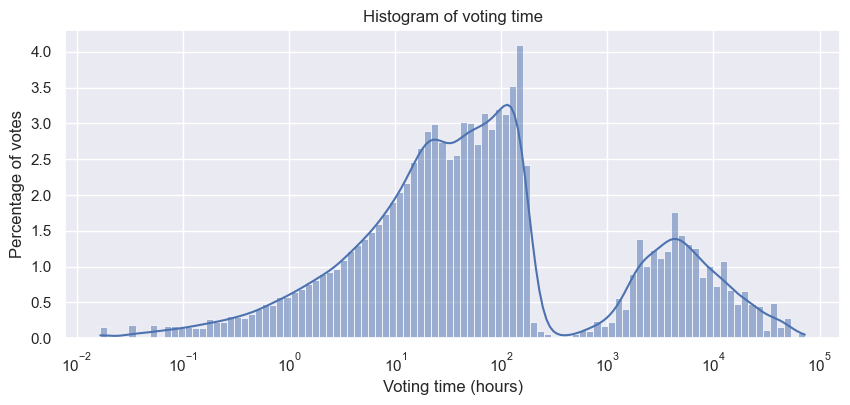

In [120]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time',kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

#### Plot distribution in function of time

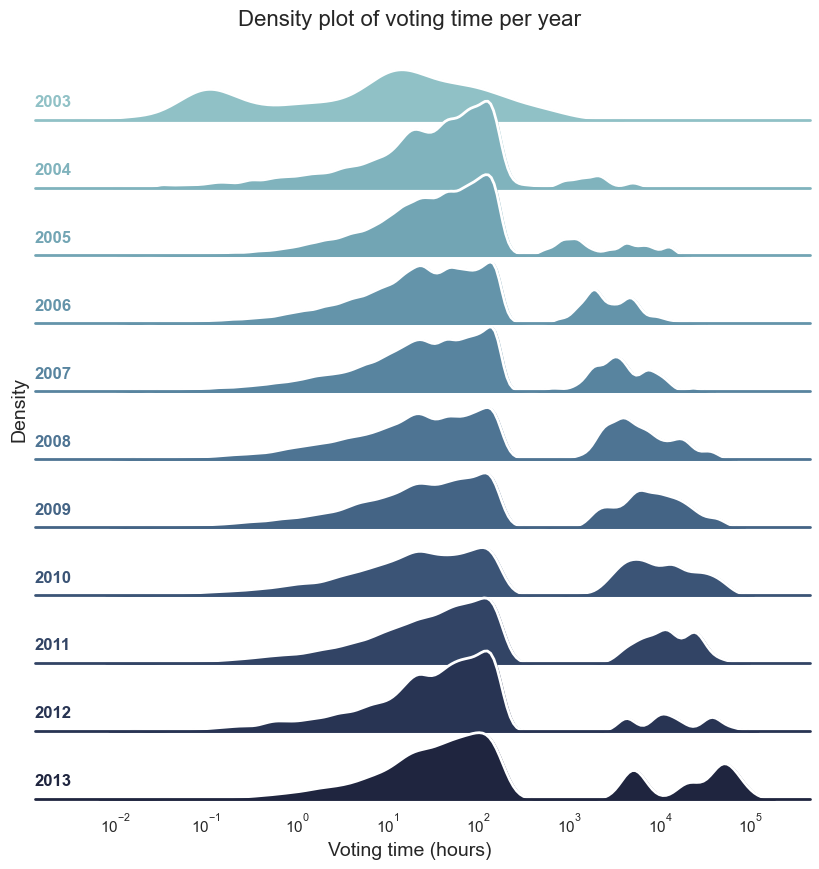

In [121]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df_plot, row='Year', hue='Year', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'Voting_time', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, log_scale=(True, False))
g.map(sns.kdeplot, 'Voting_time', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Voting_time')

# Set figure properties
#g.fig.set_tight_layout(True)
g.fig.subplots_adjust(hspace=-.25)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
g.fig.suptitle('Density plot of voting time per year', fontsize=16, y=0.9)
g.fig.supylabel('Density', fontsize=14, x=0.1)
g.fig.supxlabel('Voting time (hours)', fontsize=14, y=0.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)

plt.show()
sns.set_theme()

We can first notice that in 2003 the voting time distribution was quite different from the other years. Indeed, the voting times were much more spread out and shifted to the left. This is probably due to the fact that at the creation of election system, the rules were not yet well established so the behaviour of the voters was not very consistent. We will start by checking if the 2003 data represents a significant part of the data. 

In [122]:
portion_2003 = df[df['Year'] == 2003].shape[0] / df.shape[0]
print(f'Portion of 2003 data: {portion_2003:.2%}')

Portion of 2003 data: 0.10%


Knowing that the amount of data for 2003 represents only 0.1% of the total data, we can consider that these data are negligible and we can remove them from the dataset. 

In [123]:
df = df[df['Year'] != 2003]
#df.to_csv('wiki-RfA.csv')

df_timeserie = df_timeserie[df_timeserie['Year'] != 2003]
# Update the voting time of the df_timeserie dataframe
voting_time = (df_timeserie.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')
df_timeserie = df_timeserie.drop(columns=['Voting_time']).join(voting_time.droplevel(0))

df_plot = df_timeserie[df_timeserie.Voting_time != 0]

## Time interval between votes

The bimodal distribution we get when plotting on a log scale was unexpected, thus and to find an explanation to this phenomenon, we can look at the distribution of time intervals between votes:

In [124]:
# Separate the vote for a candidate by elections rounds (i.e. when there is no new vote for a target during 72 hours)
votes_gap = df_timeserie.groupby('Target').Voting_time.apply(lambda x: x.sort_values().diff())
votes_gap.describe()

count    185347.000000
mean         20.178270
std         514.053799
min           0.000000
25%           0.200000
50%           0.700000
75%           2.225000
max       72247.600000
Name: Voting_time, dtype: float64

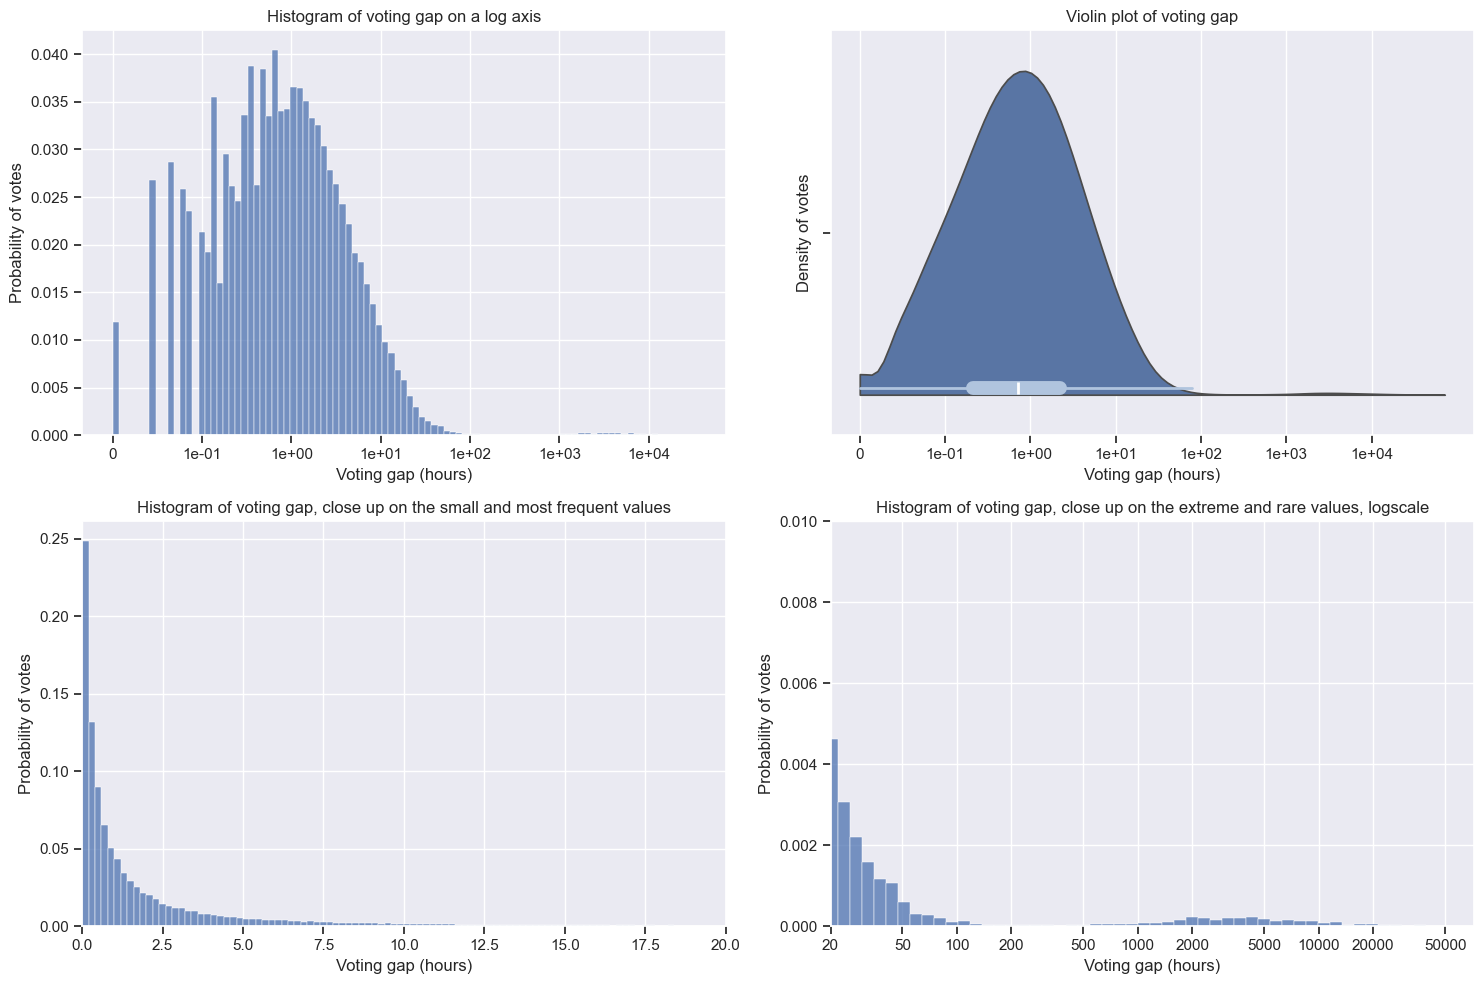

In [125]:
# Plot histogram of voting gap
fig, ax = plt.subplots(2,2, figsize=(15,10), tight_layout=True)

log_shift = 0.01
votes_gap_plot = votes_gap.dropna() + log_shift

sns.histplot(data=votes_gap_plot, ax=ax[0,0], stat='probability', bins=100, log_scale=(True, False))
ax[0,0].set_title('Histogram of voting gap on a log axis')
ax[0,0].set_xlabel('Voting gap (hours)')
ax[0,0].set_ylabel('Probability of votes')
ax[0,0].tick_params(bottom=True, left=True)
ax[0,0].set_xlim(0, np.max(votes_gap))
ticks = np.power(10, np.arange(np.log10(log_shift), np.ceil(np.log10(np.max(votes_gap_plot))), 1))
labels = [f'{tick:.0e}' for tick in ticks]
labels[0] = '0'
ax[0,0].set_xticks(ticks, labels=labels)

# Violin plot of voting gap
sns.violinplot(data=votes_gap_plot, ax=ax[0,1], orient='h', bw=0.2, cut=0, log_scale=(True, False), split=True, inner_kws=dict(box_width=10, whis_width=2, color="lightsteelblue"))
ax[0,1].set_title('Violin plot of voting gap')
ax[0,1].set_xlabel('Voting gap (hours)')
ax[0,1].set_ylabel('Density of votes')
ax[0,1].tick_params(bottom=True, left=True)
ax[0,1].set_xticks(ticks, labels=labels)

sns.histplot(data=votes_gap, ax=ax[1,0], stat='probability', bins=100, binrange=(0,20))
ax[1,0].set_title('Histogram of voting gap, close up on the small and most frequent values')
ax[1,0].set_xlabel('Voting gap (hours)')
ax[1,0].set_ylabel('Probability of votes')
ax[1,0].set_xlim(0, 20)
ax[1,0].tick_params(bottom=True, left=True)


sns.histplot(data=votes_gap, ax=ax[1,1], stat='probability', bins=100, log_scale=(True, False))
ax[1,1].set_title('Histogram of voting gap, close up on the extreme and rare values, logscale')
ax[1,1].set_xlabel('Voting gap (hours)')
ax[1,1].set_ylabel('Probability of votes')
ax[1,1].set_xlim(20, np.max(votes_gap))
ax[1,1].set_ylim(0, 0.01)
ax[1,1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000], labels=['20', '50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']) 
ax[1,1].tick_params(bottom=True, left=True)

plt.show()

In [126]:
# Extract the voting gap correspong to less than 1% of the voting gap
votes_gap[votes_gap >= votes_gap.quantile(0.99)].min()

26.83333333333333

We can see that the distribution of the time interval between votes almost follows an exponential distribution (which is what we would expect for this type of data). However, we can see that there is an additional very small peak between 1000 and 20000 hours, which reveals the presence of multiple batches/aggregate of votes separated by a long period of time. We interpret this as different rounds of elections. Indeed, some target are not elected at the first try and they run for admin again after a certain period of time. We now want to separate the data into different rounds of elections for each target.

### Separate data into rounds of elections

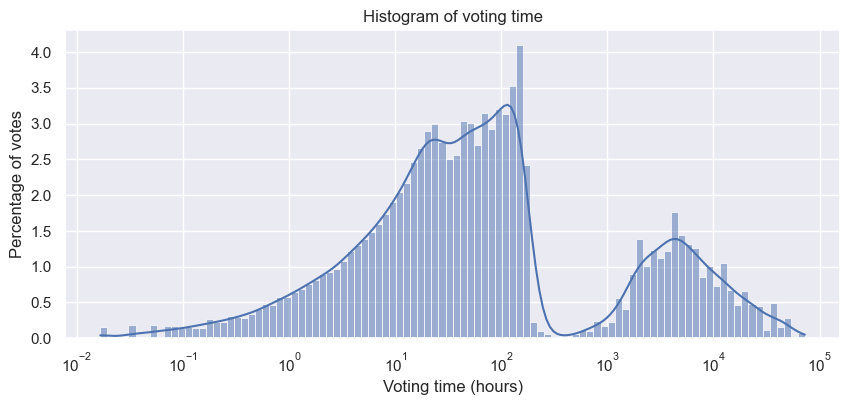

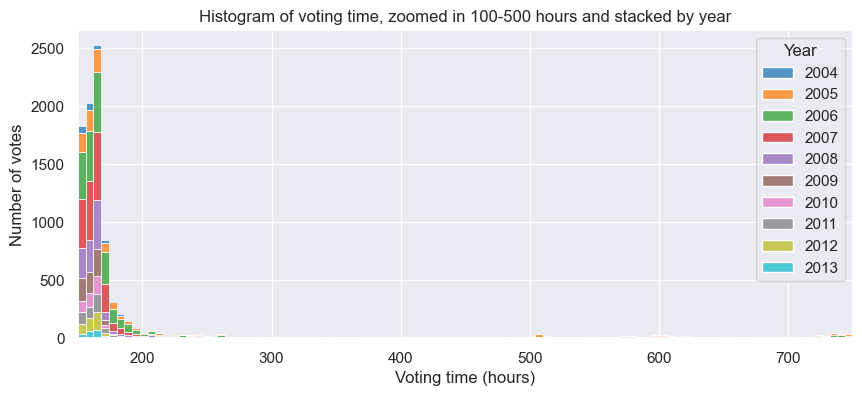

After this threshold in hours, we consider that the incoming votes are part of a new election: 391.11 hours
Percentage of votes happening at this threshold: 0.041%


In [127]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

# Close up the voting time to 100-500 hours
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='count', log_scale=(False, False), binrange=(150, 750), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time, zoomed in 100-500 hours and stacked by year')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Number of votes')
ax.set_xlim(150, 750)
plt.show()

# Fin the local minima
kde = kde.get_lines()[0].get_data()
deriv_kde_sign = np.sign(np.diff(kde[1]))
local_mins = kde[0][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde[1][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]

# only keep the minima with a y value < 0.1 and a x value is between 10 and 1e4
round_threshold = local_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]
percent_at_threshold = y_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]

print(f'After this threshold in hours, we consider that the incoming votes are part of a new election: {round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

To separate the different rounds of elections we focus on the gap between the 2 peaks in the distribution of voting time. First, we can observe that there is a huge drop in the amount of votes at around 170h which is consistent with the information we found on the Wikipedia page about the election duration being approximately 7 days (noting that this period can be prolonged in some cases). 
To find the best threshold to separate the data, we extracted the kernel density estimation of the distribution of voting time and we computed its local minimum in the gap between the 2 peaks and the corresponding voting time. We found that the best threshold to separate the data is 391h. We can now separate the data into different rounds of elections for each target using this threshold.

In [128]:
# Start a new round each time the interval between the current voting and the first voting time of the round is greater than the round threshold
def compute_rounds(data, round_threshold):
    data = data.sort_values('Voting_time')
    voting_time = data.Voting_time.values
    rounds = np.array([1])
    for i in range(1,len(voting_time)):
        # If the candidate is elected, we stop the round but check if there is no other vote after more than 4 month (what we consider as a new election for a candidate that may have lost its admin rights)
        if data.Results.values[i] == 1 and voting_time.max()-voting_time[i] < 24*30*4:
            round_number = rounds[-1] + (voting_time[i] > round_threshold)
            rounds = np.append(rounds, round_number*np.ones(len(voting_time)-i).astype(int))
            break
        elif (voting_time[i] > round_threshold and data.Results.values[i] != 1 and voting_time[i]-voting_time[i-1]>=24) or \
            (data.Results.values[i] == 1 and (voting_time[i] > 24*30*4 or data.Results.values[i-1] != 1)):
            rounds = np.append(rounds, rounds[-1] + 1)
            voting_time = voting_time - voting_time[i]
        elif len(rounds) >= 2 and rounds[-2] != rounds[-1]:
            rounds = np.append(rounds, rounds[-1])
            voting_time = voting_time - voting_time[i]
        else:
            rounds = np.append(rounds, rounds[-1])
            
    rounds = pd.Series(rounds, index=data.index).astype(int)
    return rounds

rounds = (df_timeserie.groupby('Target').apply(lambda x: compute_rounds(x, round_threshold))).rename('Round')
df_timeserie = df_timeserie.join(rounds.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1
...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,1
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,1
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,1


### Update the voting time given the rounds of elections

In [129]:
# Use the round number to compute the voting time in each round (i.e. the time between the current vote and the first vote of the round)
Voting_time_round = df_timeserie.groupby(['Target', 'Round']).Voting_time.apply(lambda x: x - x.min()).rename('Voting_time_in_round')
# Replace the column Voting_time by the voting time in each round
df_timeserie = df_timeserie.join(Voting_time_round.droplevel([0,1]))
df_plot = df_timeserie[df_timeserie.Voting_time != 0]
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1,1.716667
...,...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1,47.300000
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,1,111.433333
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,1,134.750000
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,1,139.200000


In [130]:
df_timeserie[df_timeserie['Target'] == 'Evercat'].Voting_time.min()

0.0

In [131]:
df_timeserie.groupby('Target').Voting_time.min().describe()

count    3430.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Voting_time, dtype: float64

In [139]:
a = df[df['Target'] == 'Robchurch'].sort_values('Date')
a = a[['Source', 'Vote', 'Results', 'Date', 'Comment']]
for i in range(0, len(a), 60):
    print(a.iloc[i:i+60])

                     Source  Vote  Results                Date  \
189912     NicholasTurnbull     1       -1 2005-10-10 00:21:00   
183093     NicholasTurnbull     1        1 2005-10-10 00:21:00   
189913      Private Butcher     1       -1 2005-10-10 00:24:00   
183094      Private Butcher     1        1 2005-10-10 00:24:00   
183095               Ral315     1        1 2005-10-10 00:54:00   
189914               Ral315     1       -1 2005-10-10 00:54:00   
183096      Sebastiankessel     1        1 2005-10-10 01:20:00   
189915      Sebastiankessel     1       -1 2005-10-10 01:20:00   
183097               Rogerd     1        1 2005-10-10 01:25:00   
189916               Rogerd     1       -1 2005-10-10 01:25:00   
189917     Hamster Sandwich     1       -1 2005-10-10 01:37:00   
183098     Hamster Sandwich     1        1 2005-10-10 01:37:00   
189918         Mindspillage     1       -1 2005-10-10 01:49:00   
183099         Mindspillage     1        1 2005-10-10 01:49:00   
189919    

In [132]:
vot_gap_pb1 = df_timeserie.groupby(['Target']).apply(lambda x: (x.sort_values('Voting_time').Voting_time.diff() <= 4*24))
vot_gap_pb2 = df_timeserie.groupby(['Target']).apply(lambda x: (x.sort_values('Voting_time').Round.diff() != 0))
vot_gap_pb = vot_gap_pb1 & vot_gap_pb2
vot_gap_pb = vot_gap_pb[vot_gap_pb].index.get_level_values(0).unique()
print(vot_gap_pb)
print(len(vot_gap_pb))
all_pb = df_timeserie[df_timeserie['Target'].isin(vot_gap_pb)].sort_values(['Target', 'Round', 'Voting_time_in_round'])
print(all_pb.shape)
for i in range(0, 20):
    display(all_pb.iloc[i*60:(i+1)*60])
#all_pb2.sort_values('Voting_time').iloc[:60]

Index(['Robchurch'], dtype='object', name='Target')
1
(437, 10)


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
189912,NicholasTurnbull,Robchurch,1,-1,2005,2005-10-10 00:21:00,"Why, of course. --",0.000000,1,0.000000
183093,NicholasTurnbull,Robchurch,1,1,2005,2005-10-10 00:21:00,"Why, of course. --",0.000000,2,0.000000
189913,Private Butcher,Robchurch,1,-1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu...",0.050000,2,0.050000
183094,Private Butcher,Robchurch,1,1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu...",0.050000,3,0.000000
183095,Ral315,Robchurch,1,1,2005,2005-10-10 00:54:00,"'''Support''' again. Good user, good person, ...",0.550000,3,0.500000
189914,Ral315,Robchurch,1,-1,2005,2005-10-10 00:54:00,"'''Support''' again. Good user, good person, ...",0.550000,3,0.500000
183096,Sebastiankessel,Robchurch,1,1,2005,2005-10-10 01:20:00,'''Support''' Promised myself that I wasn't go...,0.983333,4,0.000000
189915,Sebastiankessel,Robchurch,1,-1,2005,2005-10-10 01:20:00,'''Support''' Promised myself that I wasn't go...,0.983333,4,0.000000
183097,Rogerd,Robchurch,1,1,2005,2005-10-10 01:25:00,'''Support''' --,1.066667,5,0.000000
189916,Rogerd,Robchurch,1,-1,2005,2005-10-10 01:25:00,'''Support''' --,1.066667,5,0.000000


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
183123,Jtkiefer,Robchurch,1,1,2005,2005-10-10 22:59:00,'''Support''' even though I normally don't lik...,22.633333,27,0.500000
189942,Jtkiefer,Robchurch,1,-1,2005,2005-10-10 22:59:00,'''Support''' even though I normally don't lik...,22.633333,27,0.500000
189943,Titoxd,Robchurch,1,-1,2005,2005-10-11 00:55:00,"'''Support''', RFA cliché No. 1.",24.566667,27,2.433333
183124,Titoxd,Robchurch,1,1,2005,2005-10-11 00:55:00,"'''Support''', RFA cliché No. 1.",24.566667,28,0.000000
189944,RN,Robchurch,1,-1,2005,2005-10-11 02:38:00,'''Support''' you actually notified redwolf an...,26.283333,28,1.716667
183125,RN,Robchurch,1,1,2005,2005-10-11 02:38:00,'''Support''' you actually notified redwolf an...,26.283333,29,0.000000
189946,MONGO,Robchurch,1,-1,2005,2005-10-11 03:09:00,'''Support''' a good pick for sure.--,26.800000,29,0.516667
183127,MONGO,Robchurch,1,1,2005,2005-10-11 03:09:00,'''Support''' a good pick for sure.--,26.800000,30,0.000000
189947,Cyberjunkie,Robchurch,1,-1,2005,2005-10-11 06:36:00,'''Support''' dedicated editor. --,30.250000,30,3.450000
183128,Cyberjunkie,Robchurch,1,1,2005,2005-10-11 06:36:00,'''Support''' dedicated editor. --,30.250000,31,0.000000


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
165926,Rx StrangeLove,Robchurch,1,-1,2006,2005-12-28 00:16:00,'''Support''' Everything Nicholas says is true...,1895.916667,51,0.033333
165927,Jtkiefer,Robchurch,1,-1,2006,2005-12-28 00:17:00,(after 3 edit conflicts) I'm sure he'll make g...,1895.933333,51,0.050000
165928,Marudubshinki,Robchurch,1,-1,2006,2005-12-28 00:18:00,"''Support''. Well heck, if he wants it back... --",1895.950000,51,0.066667
165929,Aranda56,Robchurch,1,-1,2006,2005-12-28 00:22:00,'''Strong Support''' --,1896.016667,51,0.133333
165930,Astrotrain,Robchurch,1,-1,2006,2005-12-28 00:26:00,'''Support'''-,1896.083333,51,0.200000
165931,Mindspillage,Robchurch,1,-1,2006,2005-12-28 00:57:00,'''Support'''. He sees his lapse in judgment f...,1896.600000,51,0.716667
165932,FrancisTyers,Robchurch,1,-1,2006,2005-12-28 01:01:00,'''Support''' isn't it -,1896.666667,51,0.783333
165933,Hamster Sandwich,Robchurch,1,-1,2006,2005-12-28 01:11:00,'''Support''' as per nom. Good egg!,1896.833333,51,0.950000
165934,Christopher Parham,Robchurch,1,-1,2006,2005-12-28 01:59:00,"'''Support''', unlikely to abuse admin tools.",1897.633333,51,1.750000
165935,Jobe6,Robchurch,1,-1,2006,2005-12-28 02:00:00,'''Support''' After edit conflict.,1897.650000,51,1.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
165974,Bratsche,Robchurch,1,-1,2006,2005-12-29 05:46:00,'''Supporting''' on the basis of the actions a...,1925.416667,51,29.533333
165975,Duk,Robchurch,1,-1,2006,2005-12-29 05:52:00,'''Support'''--,1925.516667,51,29.633333
166026,Dlyons493,Robchurch,0,-1,2006,2005-12-29 13:56:00,'''Neutral''' as per most of the above neutral...,1933.583333,51,37.700000
165976,Dbiv,Robchurch,1,-1,2006,2005-12-29 15:59:00,'''Support'''. Has an essential quality in adm...,1935.633333,51,39.750000
165977,Flcelloguy,Robchurch,1,-1,2006,2005-12-29 19:03:00,NaN,1938.700000,51,42.816667
165978,Antandrus,Robchurch,1,-1,2006,2005-12-29 19:04:00,'''Support'''. Absolutely.,1938.716667,51,42.833333
165998,SoothingR,Robchurch,-1,-1,2006,2005-12-29 21:56:00,'''Oppose'''. Although the user asked for his ...,1941.583333,51,45.700000
165979,E. Brown,Robchurch,1,-1,2006,2005-12-30 01:22:00,'''Support'''. A responsible person who doesn'...,1945.016667,51,49.133333
165999,Durin,Robchurch,-1,-1,2006,2005-12-30 02:07:00,'''Oppose''': You'd block someone [http://en.w...,1945.766667,51,49.883333
166000,Hedley,Robchurch,-1,-1,2006,2005-12-30 03:19:00,'''Strong Oppose'''. I initially supported Rob...,1946.966667,51,51.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
166048,Afonso Silva,Robchurch,1,-1,2006,2006-05-20 16:56:00,'''Support''',5344.583333,52,13.150000
166049,Werdnabot,Robchurch,1,-1,2006,2006-05-20 16:57:00,'''Editconflict Support''' per Rory096 <span c...,5344.600000,52,13.166667
166242,Voice of All,Robchurch,0,-1,2006,2006-05-20 17:07:00,<s>'''Weak Support''' per Rory096.''',5344.766667,52,13.333333
166236,Mailer diablo,Robchurch,0,-1,2006,2006-05-20 17:11:00,"Does not appear to meet [[WP:1FA]], but has ma...",5344.833333,52,13.400000
166051,TantalumTelluride,Robchurch,1,-1,2006,2006-05-20 17:26:00,'''Support'''. He can be trusted not to abuse ...,5345.083333,52,13.650000
166052,Ilmari Karonen,Robchurch,1,-1,2006,2006-05-20 17:30:00,"'''Support''', if only to let him edit the Med...",5345.150000,52,13.716667
166053,Raichu,Robchurch,1,-1,2006,2006-05-20 17:42:00,'''Support''' A non-sysop developer? Also a gr...,5345.350000,52,13.916667
166054,Siva1979,Robchurch,1,-1,2006,2006-05-20 17:52:00,'''Support''' A solid contributor. --<font sty...,5345.516667,52,14.083333
166055,Christopher Parham,Robchurch,1,-1,2006,2006-05-20 18:07:00,'''Support'''.,5345.766667,52,14.333333
166056,Srikeit,Robchurch,1,-1,2006,2006-05-20 18:08:00,'''Support''' No point keeping him from the to...,5345.783333,52,14.350000


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
166179,SushiGeek,Robchurch,-1,-1,2006,2006-05-21 08:11:00,'''Oppose''' per MLA.,5359.833333,52,28.400000
166101,Kotepho,Robchurch,1,-1,2006,2006-05-21 08:15:00,NaN,5359.900000,52,28.466667
166180,GT,Robchurch,-1,-1,2006,2006-05-21 09:20:00,'''Oppose''' per MLA. The edit summary below i...,5360.983333,52,29.550000
166102,Wiki alf,Robchurch,1,-1,2006,2006-05-21 11:17:00,'''Support''' Will (albeit infrequently) use t...,5362.933333,52,31.500000
166103,Enochlau,Robchurch,1,-1,2006,2006-05-21 11:27:00,'''Support'''. He has my full confidence.,5363.100000,52,31.666667
166106,William M. Connolley,Robchurch,1,-1,2006,2006-05-21 11:36:00,'''support''',5363.250000,52,31.816667
166104,Garion96,Robchurch,1,-1,2006,2006-05-21 12:15:00,'''Support'''.,5363.900000,52,32.466667
166105,Haukurth,Robchurch,1,-1,2006,2006-05-21 12:21:00,'''Support'''. He has shown that he is account...,5364.000000,52,32.566667
166107,Terence Ong,Robchurch,1,-1,2006,2006-05-21 14:05:00,"'''Syooirt''', great user. --[[User:Terence On...",5365.733333,52,34.300000
166108,Brendenhull,Robchurch,1,-1,2006,2006-05-21 15:16:00,'''Support''' He can handle it. &mdash; [[User...,5366.916667,52,35.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
166198,Royboycrashfan,Robchurch,-1,-1,2006,2006-05-22 21:38:00,'''Oppose''' per MLA and Deskana.,5397.283333,52,65.850000
166199,Master of Puppets,Robchurch,-1,-1,2006,2006-05-22 21:43:00,'''Oppose''' per recent civility issues.,5397.366667,52,65.933333
166200,Warrens,Robchurch,-1,-1,2006,2006-05-22 21:49:00,"'''Oppose''', civility doens't suddenly become...",5397.466667,52,66.033333
166142,Friday,Robchurch,1,-1,2006,2006-05-22 22:03:00,'''Support'''- no reason to believe he'd misus...,5397.700000,52,66.266667
166143,Jayjg,Robchurch,1,-1,2006,2006-05-22 22:21:00,'''Support'''.,5398.000000,52,66.566667
166144,Ragesoss,Robchurch,1,-1,2006,2006-05-22 23:40:00,'''Support'''--,5399.316667,52,67.883333
166239,TKD,Robchurch,0,-1,2006,2006-05-23 00:06:00,"'''Neutral''', more or less per Rockpocket, th...",5399.750000,52,68.316667
166201,DGX,Robchurch,-1,-1,2006,2006-05-23 00:22:00,'''Oppose''' Per above civility concerns.,5400.016667,52,68.583333
166202,Donama,Robchurch,-1,-1,2006,2006-05-23 01:36:00,'''Weak oppose''' as per [[User:Spangineer]] a...,5401.250000,52,69.816667
166203,Ingoolemo,Robchurch,-1,-1,2006,2006-05-23 04:18:00,"By God, I wish I could support, because I have...",5403.950000,52,72.516667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round
166229,Firsfron,Robchurch,-1,-1,2006,2006-05-26 06:36:00,'''Oppose'' reluctantly due to civility concer...,5478.250000,52,146.816667
166230,Dmn,Robchurch,-1,-1,2006,2006-05-26 12:45:00,'''Oppose''' civility is important to me.,5484.400000,52,152.966667
166166,the wub,Robchurch,1,-1,2006,2006-05-26 16:12:00,'''Support'''.,5487.850000,52,156.416667
166167,Amgine,Robchurch,1,-1,2006,2006-05-26 16:31:00,"'''Support''' Has the skills, has the credibil...",5488.166667,52,156.733333
166168,Buchanan-Hermit,Robchurch,1,-1,2006,2006-05-26 17:04:00,"'''Support''' I thought I voted, but guess not...",5488.716667,52,157.283333
166231,J.smith,Robchurch,-1,-1,2006,2006-05-26 17:35:00,'''Week oppose''' The civiliy problems bother ...,5489.233333,52,157.800000
166169,Jdforrester,Robchurch,1,-1,2006,2006-05-26 18:19:00,"'''Support''', absolutely.",5489.966667,52,158.533333
166232,Angr,Robchurch,-1,-1,2006,2006-05-26 22:26:00,"'''Oppose''', too many civility and credibilit...",5494.083333,52,162.650000
166170,Kylu,Robchurch,1,-1,2006,2006-05-26 22:43:00,'''Support'''. I saw the RfA the first day it ...,5494.366667,52,162.933333
166171,Frenchman113,Robchurch,1,-1,2006,2006-05-27 12:52:00,"'''Support'''. If someone wants adminship, the...",5508.516667,52,177.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_in_round


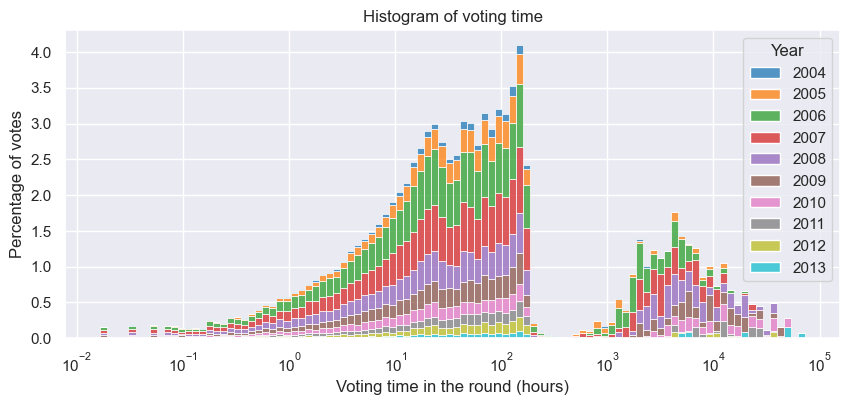

In [133]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='percent', log_scale=(True, False), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time in the round (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

The resulting rounds of elections we get using this method and threshold enable 

## Vote evolution through time

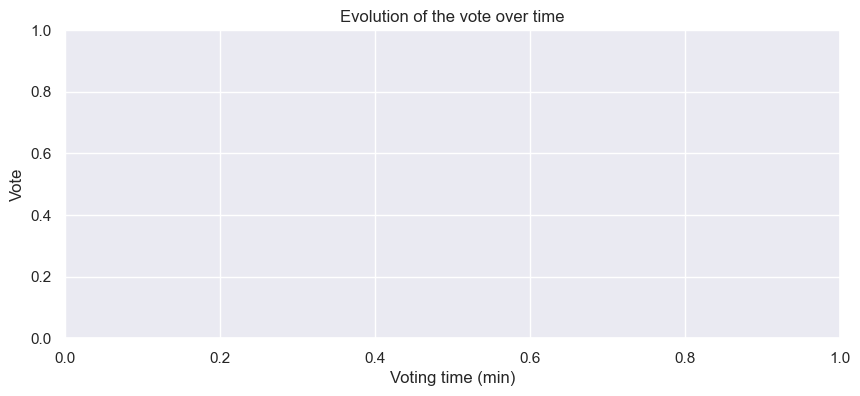

In [134]:
# Plot the evolution of 'Vote' over 'Voting_time'
fig, ax = plt.subplots(figsize=(10, 4))
#sns.lineplot(data=df_timeserie, x='Voting_time', y='Vote', hue='Target', legend=False, ax=ax, alpha=0.5)
ax.set_title('Evolution of the vote over time')
ax.set_xlabel('Voting time (min)')
ax.set_ylabel('Vote')
plt.show()